LOADING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split # To split the actual data into training and testing sets
from sklearn.preprocessing import StandardScaler # Scaling the training and testing sets as a part of data pre-processing
from sklearn.metrics import confusion_matrix,classification_report # This is to show the accuracy and the precision score of the models that has been built
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score # accuracy metric for the models
import matplotlib.pyplot as plt # To plot the visualizations
from pandas.plotting import scatter_matrix
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


IMPORTING THE DATASET

In [ ]:
dataset = pd.read_csv("/content/Heart_dataset.csv")
dataset

,age,sex,Chest Pain Type,Resting BP,Serum Cholestrol,Fasting Blood Sugar,Resting ECG,Max Heart rate achieved,Exercice induced angina,Depression induced by exercise,slope,ca,thal,target
0,57,1,2,150,126,1,1,173,0,0.2,0,0,1,1
1,57,1,0,130,131,0,1,115,1,1.2,0,0,2,1
2,44,0,2,108,141,0,1,175,0,0.6,2,0,2,1
3,71,0,0,112,149,0,1,125,0,1.6,2,0,2,1
4,49,1,2,118,149,0,0,126,0,0.8,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,62,0,0,140,394,0,0,157,0,1.2,1,0,3,0
299,63,0,0,150,407,0,0,154,0,4.0,1,0,3,0
300,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
301,65,0,2,140,417,1,0,157,0,0.8,1,1,3,0


OBTAINING THE SHAPE OF THE DATAFRAME

In [ ]:
print( 'Shape of DataFrame: {}'.format(dataset.shape))
print (dataset.loc[1])

Shape of DataFrame: (303, 14)
age                                57.0
sex                                 1.0
Chest Pain Type                     0.0
Resting BP                        130.0
Serum Cholestrol                  131.0
Fasting Blood Sugar                 0.0
Resting ECG                         1.0
Max Heart rate achieved           115.0
Exercice induced angina             1.0
Depression induced by exercise      1.2
slope                               0.0
ca                                  0.0
thal                                2.0
target                              1.0
Name: 1, dtype: float64


EDA AND VISUALIZATIONS

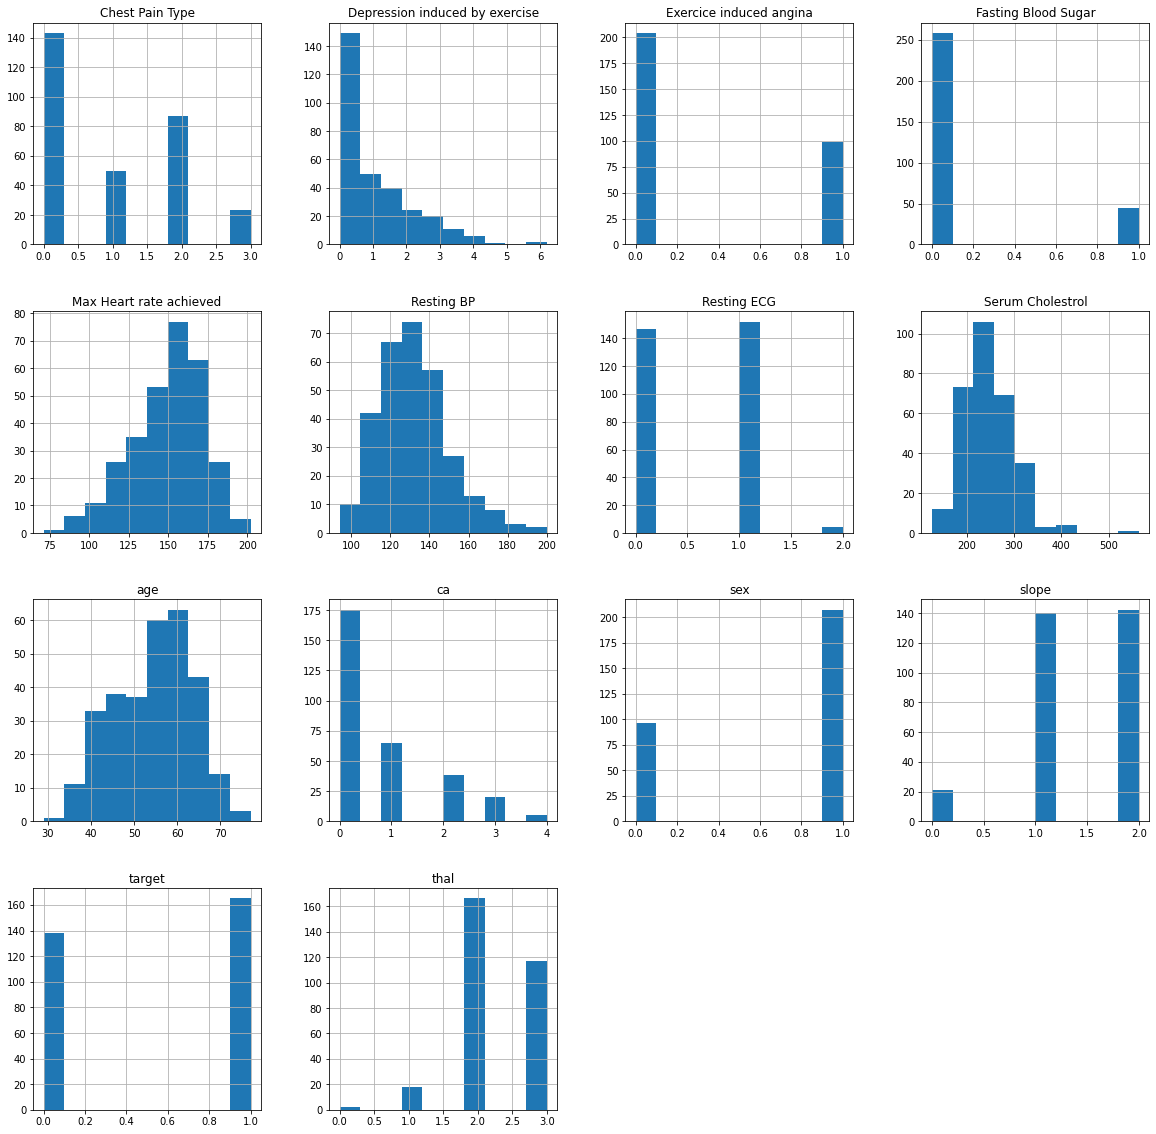

In [ ]:
# To plot the histogram of the feature and Target variables
dataset.hist(figsize = (20,20))
plt.show()

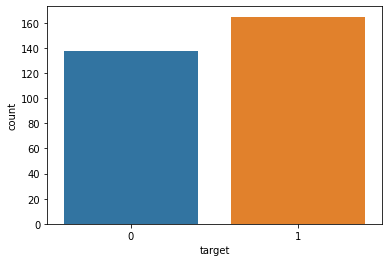

In [ ]:
# To visualize the Target column which is the dependant variable
sns.countplot(x="target", data=dataset)
plt.show()

In [ ]:
#No. of Patients having Heart disease
No_Disease = len(dataset[dataset.target == 0])
Heart_Disease = len(dataset[dataset.target == 1])
print("Percentage of Patients Doesn't have Heart Disease: {:.2f}%".format((No_Disease / (len(dataset.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((Heart_Disease / (len(dataset.target))*100)))

Percentage of Patients Doesn't have Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


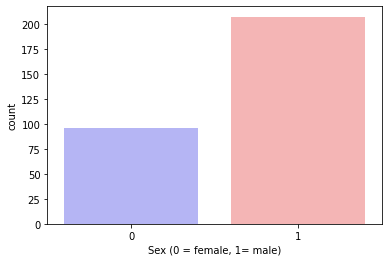

In [ ]:
#Another Visualization to show the count of Male and Female patients
sns.countplot(x='sex', data=dataset, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
#Percentage of male and female patients
F = len(dataset[dataset.sex == 0])
M = len(dataset[dataset.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((F / (len(dataset.sex))*100))) # Rounding off to 2 decimals
print("Percentage of Male Patients: {:.2f}%".format((M / (len(dataset.sex))*100)))  # Rounding off to 2 decimals

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [ ]:
# Another visualiation of the patiens having the heart disease or not
import plotly.graph_objs as go

column = "target"
grouped = dataset[column].value_counts().reset_index()
grouped = grouped.rename(columns = {column : "count", "index" : column})

## plot
pieplot = go.Pie(labels=grouped[column], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
Target_Plot = go.Figure(data = [pieplot], layout = layout)
Target_Plot

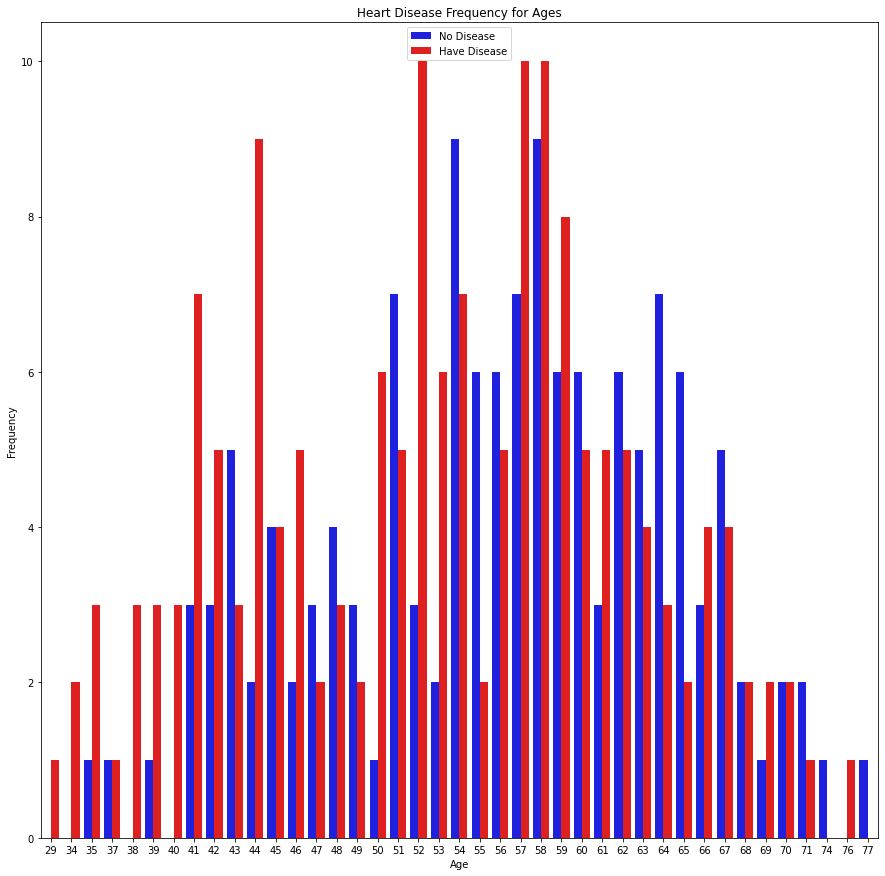

In [ ]:
# Heart disease frequency by age
plt.figure(figsize=(15, 15))
sns.countplot(x='age', hue='target', data=dataset, palette=['blue', 'red'])
plt.legend(["No Disease", "Have Disease"])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

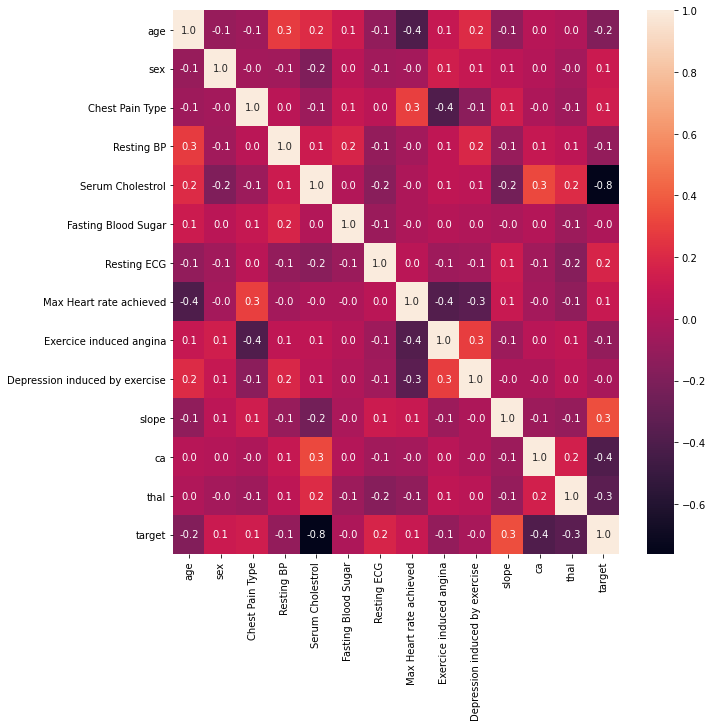

In [ ]:
# To Plot the Correlation matrix visualization of the variables in the dataset
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

Model 1 - Logistic Regression

In [ ]:
# PERFORMING NORMALIZATION AND CALCULATING ACCURACY
Y = dataset.target.values
X_data = dataset.drop(['target'], 1)

# Min-Max Normalization
X = (X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data)).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

#transpose matrices
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

#Model 1 - Logistic Regression

from sklearn.linear_model import LogisticRegression
accuracies = {}
lr = LogisticRegression()
lr.fit(X_train.T,Y_train.T)
accuracy = lr.score(X_test.T,Y_test.T)*100

accuracies['Logistic Regression'] = accuracy
print(" Accuracy of our Regression Model is  {:.2f}%".format(accuracy))

 Accuracy of our Regression Model is  85.25%


In [ ]:
Y = dataset.target.values
X_dat = dataset.drop(['target'], 1)

# Min-Max Normalization
X = (X_dat - np.min(X_dat)) / (np.max(X_dat) - np.min(X_dat)).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

#transpose matrices
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

In [ ]:
# Machine Learning Algorihm to print the metrics of the scores and accuracies for both Test and training sets 

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
# Splitting of Test and Train sets

from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model 2 -  Building the Decision Tree model


In [ ]:
#Decision tree classifier is a tree in which internal nodes are labeled by features
#The classifier categorizes an object by recursively testing for the weights that the features labeling the internal nodes have in vector, until a leaf node is reached

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, Y_train)

print_score(tree, X_train, Y_train, X_test, Y_test, train=True)
print_score(tree, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Test Result:
Accuracy Score: 98.36%
_______________________________________________
Classification Report:	Precision Score: 96.97%
			Recall Score: 100.00%
			F1 score: 98.46%
_______________________________________________
Confusion Matrix: 
 [[28  1]
 [ 0 32]]



In [ ]:
from __future__ import print_function
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Flatten

Using TensorFlow backend.


In [ ]:
# Check dimensions of both sets.
print("Train Features Size:", X_train.shape)
print("Test Features Size:", X_test.shape)
print("Train Labels Size:", Y_train.shape)
print("Test Labels Size:", Y_test.shape)


Train Features Size: (242, 13)
Test Features Size: (61, 13)
Train Labels Size: (242,)
Test Labels Size: (61,)


Model- 3 Neural Network

In [ ]:
#Model - 3
# Create a Neural network model
model = Sequential()

In [ ]:
model.add(Dense(256, activation='relu', input_dim = 13))
model.add(Dense(256, activation='relu', input_dim = 13))
model.add(Dense(128, activation='relu', input_dim = 13))
model.add(Dense(64, activation='relu', input_dim = 13))
model.add(Dense(32, activation='relu', input_dim = 13))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
NN_model = model.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=50)

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5331 - val_loss: 0.6510 - val_accuracy: 0.5246
Epoch 2/50
242/242 [==============================] - 0s 182us/step - loss: 0.6148 - accuracy: 0.6901 - val_loss: 0.5666 - val_accuracy: 0.9016
Epoch 3/50
242/242 [==============================] - 0s 228us/step - loss: 0.5154 - accuracy: 0.8884 - val_loss: 0.4961 - val_accuracy: 0.8852
Epoch 4/50
242/242 [==============================] - 0s 225us/step - loss: 0.5078 - accuracy: 0.7603 - val_loss: 0.4080 - val_accuracy: 0.9016
Epoch 5/50
242/242 [==============================] - 0s 215us/step - loss: 0.3803 - accuracy: 0.9050 - val_loss: 0.4884 - val_accuracy: 0.8689
Epoch 6/50
242/242 [==============================] - 0s 189us/step - loss: 0.3414 - accuracy: 0.8967 - val_loss: 0.3197 - val_accuracy: 0.9016
Epoch 7/50
242/242 [==============================] - 0s 194us/step - loss: 0.3094 - accuracy

In [ ]:
## checking the model score 
result = model.evaluate(X_test,Y_test)

61/61 [==============================] - 0s 150us/step


In [ ]:
rmse = np.sqrt(result)
print(rmse)

[0.42716123 0.94087508]


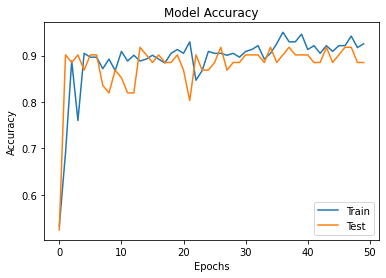

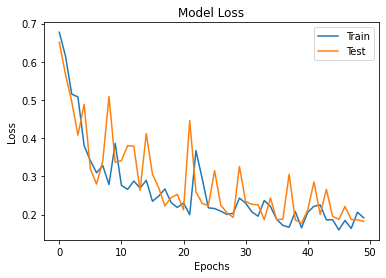

In [ ]:
from matplotlib import pyplot as plt


# Plot the model accuracy vs. number of Epochs
plt.plot(NN_model.history['accuracy'])
plt.plot(NN_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(NN_model.history['loss'])
plt.plot(NN_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()